# Example 2: The influence of weight combination in EEXE simulations

In this notebook, we will use `sampling_simulator` to investigate if weight combination is beneficial to weight equilibration in weight-updating EEXE simulations. The system and the reference free energy surface we use here are the same as those adopted in Example 1. Similarly, we note the following caveats:
- The sampling in the configurational space is completely ignored, which implies the following:
  - $\Delta U$ in the calculation of the acceptance ratio is always 0.
  - There are no exchanges between coordinates, so an EEXE simulation can be reprented by an ensemble of decoupled EXE simulations sampling different alchemical ranges.
- We have not implemented the $1/t$-variant of the Wang-Landau algorithm in `wang_landau_algorithm.py`.

## 1. Weight-updating EEXE simulations without weight combination

Note that instead of using `WL_Simulator` in `wang_landau_algorithm.py`, here we use `EnsembleEXE` in `ensemble_exe` that wrap around the functionalities in `WL_Simulator` to more easily access important attributes for analysis. Note that each replica here is still independent of other replicas since the sampling in the configuraitonal space is completely ignored. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
from sampling_simulator.ensemble_exe import utils
from sampling_simulator.ensemble_exe import EnsembleEXE

rc('font', **{
        'family': 'sans-serif',
        'sans-serif': ['DejaVu Sans'],
        'size': 10,
    })
# Set the font used for MathJax - more on thiprint(images)
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif')

In [2]:
params_dict = {
    'n_sim': 4,
    's': 7,
    'n_steps': 500,
    'n_iters': 50,
    'wl_ratio': 0.8,
    'wl_scale': 0.7,
    'wl_delta': 10,
    'wl_delta_cutoff': 0.001,
    'verbose': False,
    'w_combine': False
}

In [3]:
f_ref = np.array([
    0.0, 57.805215366068346, 112.49325354921746, 163.9053804543671, 211.1228680338599, 254.58059732433938, 295.5660812208014,
    334.6531501257331, 371.45476696195874, 406.65593569265764, 439.2891881651442, 469.42891547180665, 497.15580279170484,
    522.4463901739871, 545.4157353241036, 566.0988033555478, 584.5719734781715, 600.4976380135653, 614.3116862505102, 625.6622986339568,
    634.9000108527418, 639.2141393579959, 643.3695667349867, 647.2981063000773, 650.9040500232999, 652.5280053311945, 653.9774650452159,
    655.178901008137, 656.0135314031018, 656.2533557264542, 656.2030286485515, 655.7434099493724, 654.7837017140891, 653.4171450203427,
    651.8897886531751, 650.4268292093915, 649.155734577982, 647.8279229679827, 646.8756268046341, 645.4731180684097,
], dtype=float)

In [4]:
rmse, cost = [], []
for i in range(10):
    section_title = f'\nReplicate {i + 1}:'
    print(section_title)
    print('=' * (len(section_title) - 1))
    EEXE_simulator = EnsembleEXE(params_dict, f_ref)
    EEXE_simulator.run()
    rmse.append(EEXE_simulator.rmse)
    cost.append(np.max(EEXE_simulator.equil_time_all) * EEXE_simulator.n_sim)
    
print(f'\n\nComputational cost: {np.mean(cost):.0f} +/- {np.std(cost, ddof=1):.0f} A.U.')
print(f'RMSE for the whole-range alchemical weights: {np.mean(rmse):.4f} +/- {np.std(rmse, ddof=1):.3f} kT')


Replicate 1:

The alchemical weights have been equilibrated in all replicas!
  Equilibration time of states 0 to 18: 16999 steps
  Equilibration time of states 7 to 25: 16727 steps
  Equilibration time of states 14 to 32: 16730 steps
  Equilibration time of states 21 to 39: 16842 steps

RMSE of the whole-range alchemical weights: 0.032 kT

Replicate 2:

The alchemical weights have been equilibrated in all replicas!
  Equilibration time of states 0 to 18: 18203 steps
  Equilibration time of states 7 to 25: 18171 steps
  Equilibration time of states 14 to 32: 18311 steps
  Equilibration time of states 21 to 39: 18092 steps

RMSE of the whole-range alchemical weights: 0.019 kT

Replicate 3:

The alchemical weights have been equilibrated in all replicas!
  Equilibration time of states 0 to 18: 17688 steps
  Equilibration time of states 7 to 25: 17708 steps
  Equilibration time of states 14 to 32: 17686 steps
  Equilibration time of states 21 to 39: 17901 steps

RMSE of the whole-range alc

Note that one can plot the following figures for analysis. Not that the histogram shown below was reset to 0 only a few hundreds steps before so the statistics might not be reprensentative. 

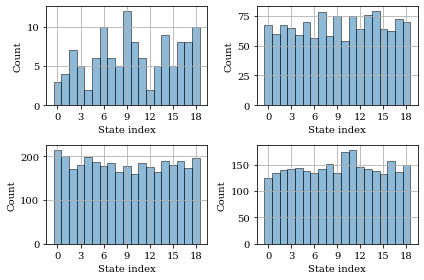

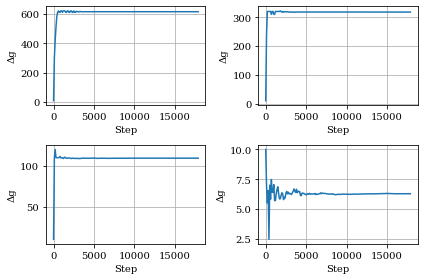

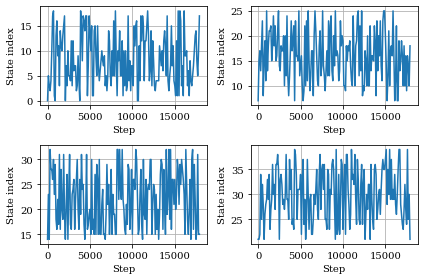

In [5]:
n_rows, n_cols = utils.get_subplot_dimension(EEXE_simulator.n_sim)

plt.figure()
for i in range(EEXE_simulator.n_sim):
    plt.subplot(n_rows, n_cols, i + 1)
    EEXE_simulator.simulators[i].plot_hist()
    plt.tight_layout()

plt.figure()
for i in range(EEXE_simulator.n_sim):
    plt.subplot(n_rows, n_cols, i + 1)
    EEXE_simulator.plot_timeseries(EEXE_simulator.simulators[i].dg, 'Δg')
    plt.tight_layout()

plt.figure()
for i in range(EEXE_simulator.n_sim):
    plt.subplot(n_rows, n_cols, i + 1)
    start_idx = i * EEXE_simulator.s
    EEXE_simulator.plot_timeseries(np.array(EEXE_simulator.simulators[i].traj) + start_idx, 'State index')
    plt.tight_layout()

## 2. Weight-updating EEXE simulations with weight combination

In [6]:
params_dict['w_combine'] = True
rmse, cost = [], []
for i in range(10):
    section_title = f'\nReplicate {i + 1}:'
    print(section_title)
    print('=' * (len(section_title) - 1))
    EEXE_simulator = EnsembleEXE(params_dict, f_ref)
    EEXE_simulator.run()
    rmse.append(EEXE_simulator.rmse)
    cost.append(np.max(EEXE_simulator.equil_time_all) * EEXE_simulator.n_sim)
    
print(f'\n\nComputational cost: {np.mean(cost):.0f} +/- {np.std(cost, ddof=1):.0f} A.U.')
print(f'RMSE for the whole-range alchemical weights: {np.mean(rmse):.4f} +/- {np.std(rmse, ddof=1):.3f} kT')


Replicate 1:

The alchemical weights have been equilibrated in all replicas!
  Equilibration time of states 0 to 18: 17011 steps
  Equilibration time of states 7 to 25: 17319 steps
  Equilibration time of states 14 to 32: 17441 steps
  Equilibration time of states 21 to 39: 17213 steps

RMSE of the whole-range alchemical weights: 0.040 kT

Replicate 2:

The alchemical weights have been equilibrated in all replicas!
  Equilibration time of states 0 to 18: 19967 steps
  Equilibration time of states 7 to 25: 19594 steps
  Equilibration time of states 14 to 32: 19645 steps
  Equilibration time of states 21 to 39: 19620 steps

RMSE of the whole-range alchemical weights: 0.043 kT

Replicate 3:

The alchemical weights have been equilibrated in all replicas!
  Equilibration time of states 0 to 18: 17635 steps
  Equilibration time of states 7 to 25: 17787 steps
  Equilibration time of states 14 to 32: 17822 steps
  Equilibration time of states 21 to 39: 17746 steps

RMSE of the whole-range alc

As a result, weight combination did not shorten the equilibration time for weight-updating EEXE simulations. 